## Recognizing handwritten digits with k-Nearest Neighbors on MNIST

In [26]:
# Day 3, Problem: Recognize handwritten digits with k-Nearest Neighbors on MNIST
# This is a classification problem.

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load the MNIST data

In [27]:
mnist_data = fetch_openml('mnist_784', version=1, as_frame=True, parser='auto')

In [28]:
type(mnist_data)

sklearn.utils._bunch.Bunch

In [29]:
mnist_data.frame.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### Step 2: Preprocess the Data

In [30]:
# The image of size 28x28 pixel is already flattened into 784 feature vector.
X = mnist_data.data
y = mnist_data.target

In [31]:
print('X:',X.shape)
print('y:',y.shape)

X: (70000, 784)
y: (70000,)


In [32]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Step 3: Normalize the data.

In [34]:
X /= 255.0

### Step 4: Split into training(80%) and validation(20%) set

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print('X_train:',len(X_train))
print('X_val:',len(X_val))
print('y_train:',len(y_train))
print('y_val:',len(y_val))

X_train: 56000
X_val: 14000
y_train: 56000
y_val: 14000


### Step 5: Create and train the model

In [37]:
# We start with K=3, which is normal and initial choice. Later experiment with it.
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 6: Make Predictions and Evaluate the Model.

In [38]:
predictions = model.predict(X_val)
# Evaluate actual value against predicted values.
accuracy = accuracy_score(y_val, predictions)
print("\nAccuracy:\n", accuracy)
# You can see True Positives in diagonally and all other FP, FN, TN in other columns.
# The TP are in good number that is why the accuracy is 0.97
confusion_matrix = confusion_matrix(y_val, predictions)
print("\nConfusion Matrix:\n", confusion_matrix)
classification_report = classification_report(y_val, predictions)
print("\nClassfication Report:\n", classification_report)


Accuracy:
 0.9712857142857143

Confusion Matrix:
 [[1335    0    5    0    0    0    1    1    1    0]
 [   0 1591    3    0    1    1    0    3    0    1]
 [   8   14 1333    1    1    1    4   13    3    2]
 [   0    3   12 1382    0   10    2   10    7    7]
 [   3    9    1    0 1248    0    2    4    1   27]
 [   4    5    0   13    4 1234   12    0    1    0]
 [   5    1    0    0    4    3 1383    0    0    0]
 [   1   17    4    0    2    0    0 1467    1   11]
 [   6   13    8   21    4   16    3    6 1269   11]
 [   6    6    3   14   20    0    0   14    1 1356]]

Classfication Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6   

In [ ]:
### Step 7: CheFor different K values

In [45]:
score = []
neighbors = []

# Loop over different values of k for the KNN model
for i in range(1, 6):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    acc = accuracy_score(y_val, prediction)
    neighbors.append(i)
    score.append(acc)


In [46]:
print(f"Length of neighbors: {len(neighbors)}")
print(f"Length of Accuracy: {len(score)}")

Length of neighbors: 5
Length of Accuracy: 5


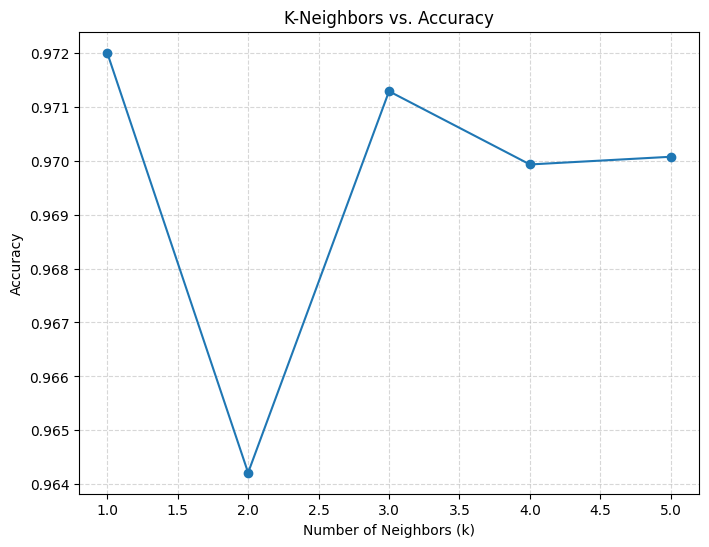

In [47]:
# Plotting the line graph
plt.figure(figsize=(8, 6))
plt.plot(neighbors, score, marker='o', linestyle='-')
plt.title('K-Neighbors vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

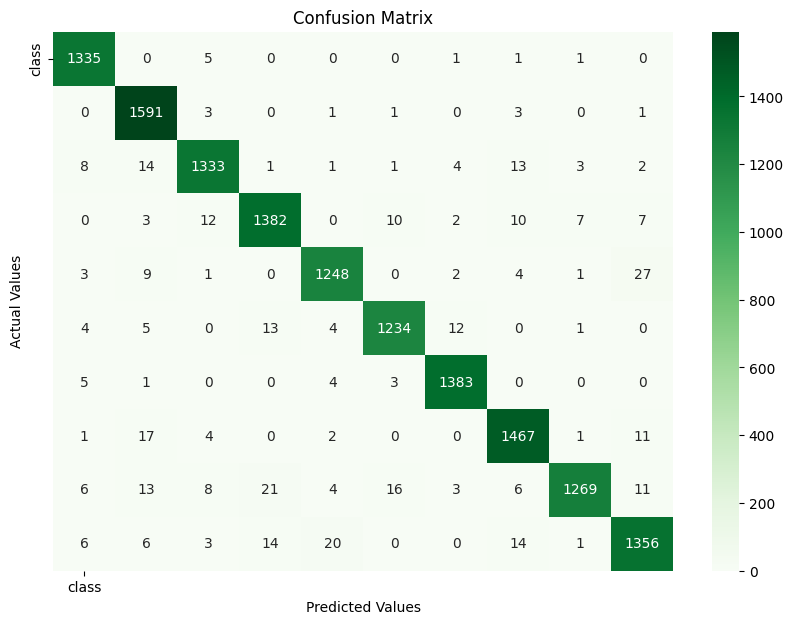

In [48]:
# Step 7: Visualization.
plt.figure(figsize=(10,7)) # I will go with Day 2 plot size.
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens', xticklabels=mnist_data.target_names, yticklabels=mnist_data.target_names)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

- Let's change the K to 1 and see what happens.
- Accuracy improved, Changes in the confusion matrix are difficult to analyze at this moment. Too many numbers.
- Let's increase the K to 10.
- Accuracy dropped significantly to: 0.9657857142857142
- At K=5, Accuracy: 0.9700714285714286
- AT K=3 the accuracy is best:  0.9712857142857143
- Let's see at K=2, Accuracy:  0.9642142857142857
- so K=3 is best for our problem.